In [38]:
import network_manipulation as nm
import network_stats as ns
import numpy as np

dataset_paths = [
'Sociopatterns datasets/conference_2009.dat_',
'Sociopatterns datasets/highschool_2011.csv',
'Sociopatterns datasets/highschool_2012.csv',
'Sociopatterns datasets/highschool_2013.csv',
'Sociopatterns datasets/hospital_2010.dat_',
'Sociopatterns datasets/primaryschool_2014.csv',
'Sociopatterns datasets/workplace_2013.dat',
'Sociopatterns datasets/workplace_2015.dat_']

dataset_names = [
    'Conference 1', 
    'Highschool 1', 
    'Highschool 2', 
    'Highschool 3', 
    'Hospital 1', 
    'Primaryschool 1', 
    'Workplace 1', 
    'Workplace 2']

Normalised weights
[69, 82, 60, 95, 38]
[0.013934426229508197, 0.001639344262295082, 0.000819672131147541, 0.02540983606557377, 0.003278688524590164]

 Free weights
[69, 82, 60, 95, 38]
[17, 2, 1, 31, 4]


(array([58., 94., 98., 64., 44., 23., 11.,  6.,  0.,  5.]),
 array([  1. ,  17.8,  34.6,  51.4,  68.2,  85. , 101.8, 118.6, 135.4,
        152.2, 169. ]),
 <BarContainer object of 10 artists>)

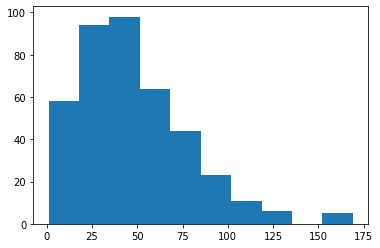

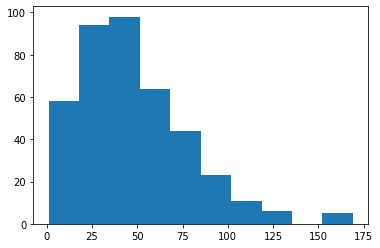

In [55]:
H = nm.build_nxgraph(dataset_paths[0], True)

norm_degrees, norm_weights = ns.analyse_graph(H)
print('Normalised weights')
print(norm_degrees[0:5])
print(norm_weights[0:5])

G = nm.build_nxgraph(dataset_paths[0], False) 

degrees, weights = ns.analyse_graph(G)

print('\n Free weights') # gym joke haha
print(degrees[0:5])
print(weights[0:5])

path = dataset_paths[0]
n = nm.build_network(path)
dd = nm.degree_dist(n)

plt.figure()
plt.hist(dd)
plt.figure()
plt.hist(degrees)


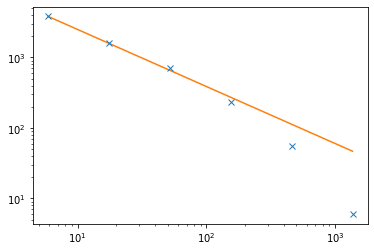

(array([ 1.60159911e+04, -8.08602749e-01]), array([4.26929428, 2.54719899]))

In [40]:
ns.check_fit(ns.weight_func, ns.log_binning, weights, [2.97, False] , False, True, 'log')


In [41]:
(47+35)/2

41.0

In [42]:
scaly = np.arange(1.5, 3.1, 0.1)
ns.compare_scale(ns.weight_func, weights, scaly, False, False)

  best scaling factor    best average error
---------------------  --------------------
                  2.8                  4.23


(2.800000000000001, 4.227722840657332)

In [43]:
scaly = np.arange(2.8, 3.0, 0.01)
scale, _ = ns.compare_scale(ns.weight_func, weights, scaly, False, False)

  best scaling factor    best average error
---------------------  --------------------
                 2.97                  3.41


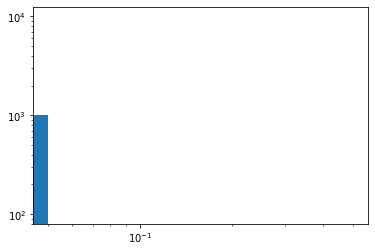

In [44]:
import matplotlib.pyplot as plt

wfit, _ = ns.check_fit(ns.weight_func, ns.log_binning, weights, [scale, False])

sample_dist = ns.weight_distribution(a = 0)
samples = sample_dist.rvs( a = wfit[0] ,b = wfit[1], size = 1000)
freqs, edges, _ = plt.hist(samples, bins = 20, density = 0)
plt.yscale('log')
plt.xscale('log')

# While I managing to generate a distribution, unfortunately the weights are
# on the order e-10 where i expected whole numbers as I am working in an 
# un-normalized regime

# further, there are some parameter combinations, which can cause a lack of
# convegence and hence a lack of a distribution, this can occur for the supposeded
# optimum scale,

In [45]:
scaly = np.arange(1.5, 3.1, 0.1)
ns.compare_scale(ns.degree_func, degrees, scaly, False, False)

  best scaling factor    best average error
---------------------  --------------------
                  2.4                  4.96


/Users/ali/MSci Project/network_stats.py:97: RuntimeWarning: divide by zero encountered in true_divide
  return (x**a) / np.exp(b*x+c)
/Users/ali/MSci Project/network_stats.py:97: RuntimeWarning: overflow encountered in true_divide
  return (x**a) / np.exp(b*x+c)
/Users/ali/MSci Project/network_stats.py:97: RuntimeWarning: overflow encountered in power
  return (x**a) / np.exp(b*x+c)


(2.400000000000001, 4.956134815843278)

In [46]:
scaly = np.arange(2.2, 2.4, 0.01)
scale, _ = ns.compare_scale(ns.degree_func, degrees, scaly, False, False)

  best scaling factor    best average error
---------------------  --------------------
                 2.39                  4.76


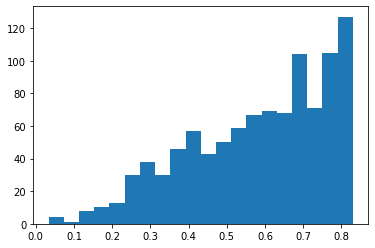

In [47]:
dfit, _ = ns.check_fit(ns.degree_func, ns.linear_binning, degrees, [8, False])

sample_dist = ns.degree_distribution(a = 0)
samples = sample_dist.rvs(a = dfit[0], b = dfit[1], c = dfit[2], size = 1000)
freqs, edges, _ = plt.hist(samples, bins = 20, density = 0)
#plt.yscale('log')
#plt.xscale('log')

# for some reason the generated distribution, which was previously perfirming well
# has now completely cahnged form

In [48]:
dfit

array([ 1.4670777 ,  0.05026528, -1.39019974])

In [49]:
a =[1, 2, 3, 0]
b = a.index(min(a))
print(b)

3
